# House Price Prediction
Predict house prices using Linear Regression and Random Forest.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

import warnings
warnings.filterwarnings('ignore')


## Load the Dataset

In [2]:
# Load dataset from sklearn (California Housing as Boston is deprecated)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Exploratory Data Analysis

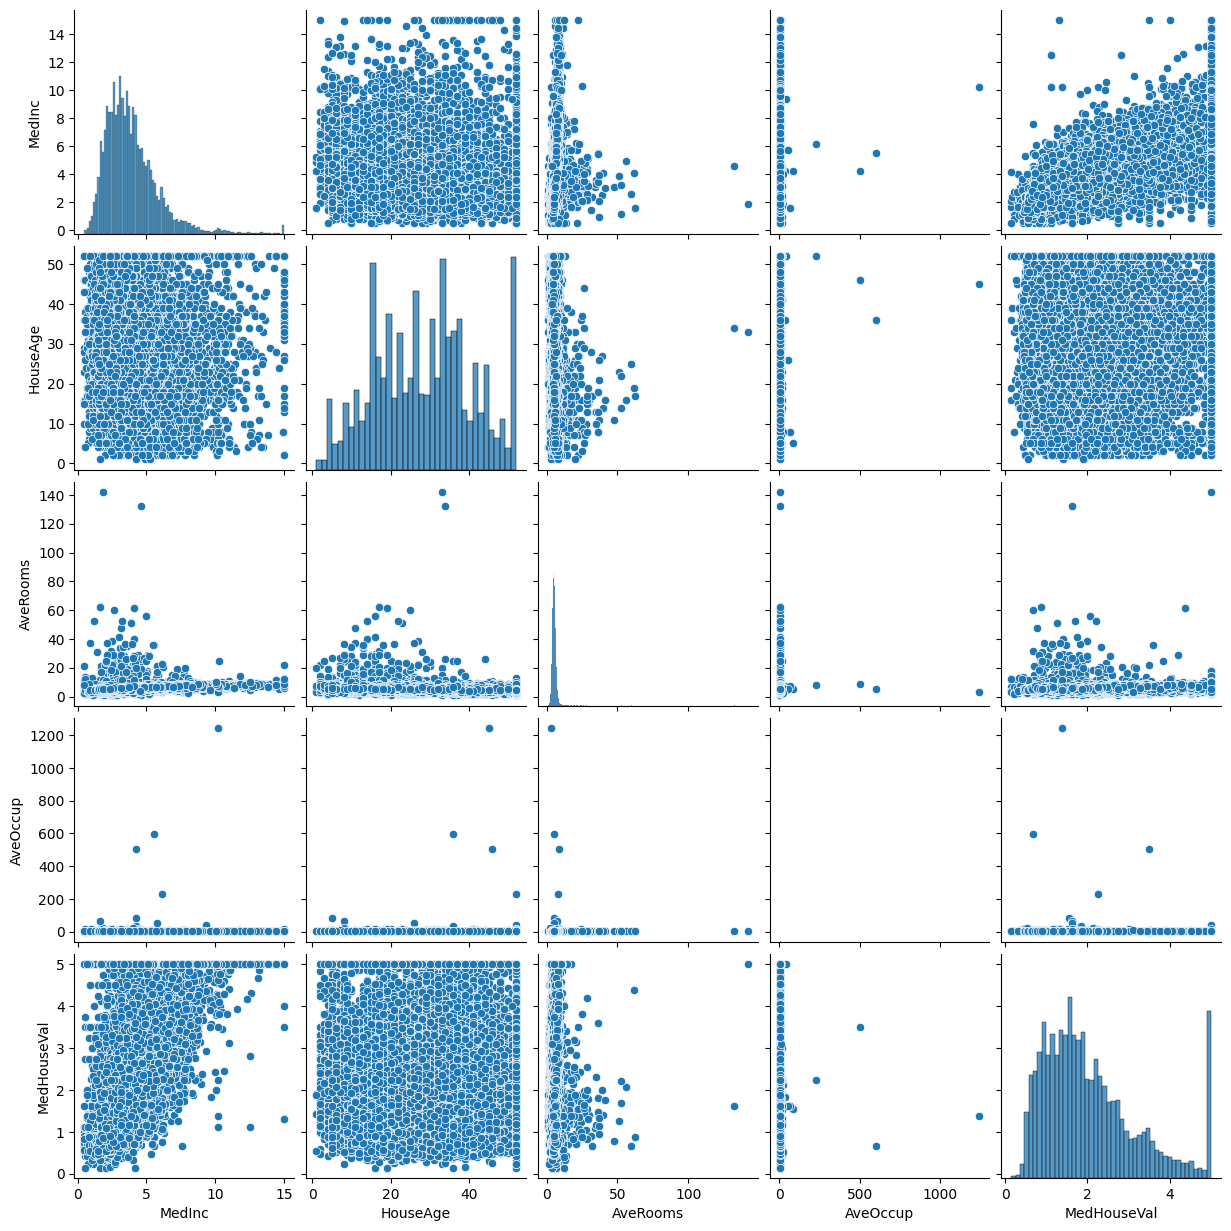

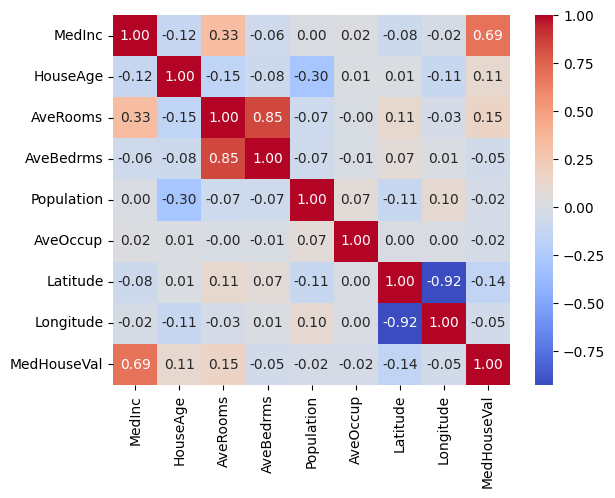

In [3]:
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']])
plt.show()

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


## Data Preprocessing

In [6]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Linear Regression

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R2 Score: 0.5757877060324511
Linear Regression RMSE: 0.7455813830127761


## Random Forest Regressor

In [10]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Random Forest R2 Score: 0.805024407701793
Random Forest RMSE: 0.7455813830127761


##  Feature Importance from Random Forest

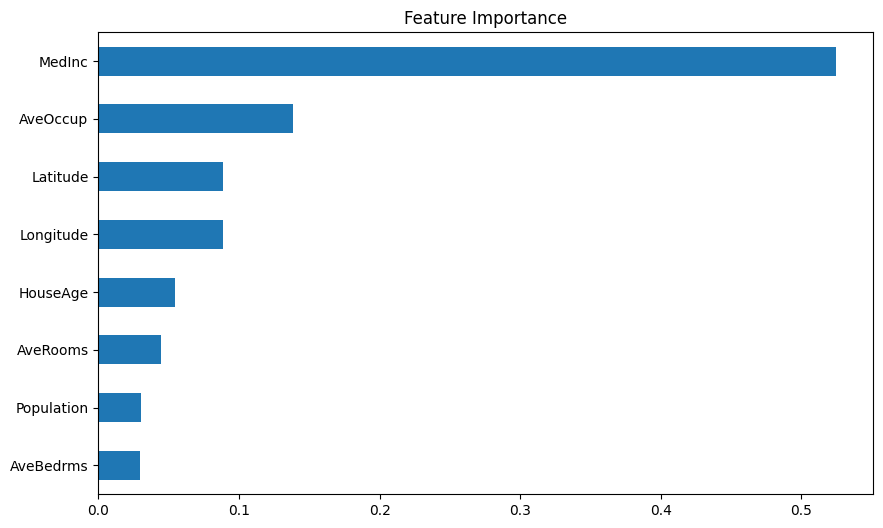

In [11]:
feature_importance = pd.Series(rf.feature_importances_, index=data.feature_names)
feature_importance.sort_values().plot(kind="barh", figsize=(10, 6), title="Feature Importance")
plt.show()


## Save Model with joblib

In [14]:
joblib.dump(rf, "random_forest_model.pkl")
print("Model saved as random_forest_model.pkl")


Model saved as random_forest_model.pkl


# Download the model

In [17]:
from google.colab import files
files.download("random_forest_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Summary
# - Compared Linear Regression and Random Forest
- Visualized features
- Saved the model using `joblib`